In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
import time
import random
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy import stats
from scipy import integrate
from celluloid import Camera
from bayes_opt import BayesianOptimization
import json
import seaborn as sns
import White_class
from scipy import special
import pymongo

In [4]:
connection = pymongo.MongoClient('localhost',27017)

db = connection.db
    
db_expected = db.Expected_model

max_parameters = db_expected.find({'target' : {"$gte" : 0.06665}},projection={"_id" : False,"datetime" : False})

# db_slowing = db.Slowing_beta

# max_parameters = db_slowing.distinct(key = 'params',filter = {'target' : {'$gte' : 23}})

for i in max_parameters:
    print(i)
    print(type(i))
    

{'target': 0.0666753843838724, 'params': {'beta_1': 0.6461462109437031, 'beta_2': 3.563920913781865, 'det_1': 117.99223775601251, 'det_2': 5.669679716550722, 'laseroff': 504757.18005055864, 'laseron': 264356.89973333676, 'main_det': 19.74010227764638}}
<class 'dict'>
{'target': 0.06665114149838881, 'params': {'beta_1': 0.16225855071834117, 'beta_2': 0.03040958868999022, 'det_1': 78.04069178017815, 'det_2': 10.631241211980964, 'laseroff': 538679.7778558542, 'laseron': 274111.0279933765, 'main_det': 18.804824545658214}}
<class 'dict'>
{'target': 0.06665084655271099, 'params': {'beta_1': 0.16225855071834117, 'beta_2': 0.09122876606997066, 'det_1': 78.04069178017815, 'det_2': 10.631241211980964, 'laseroff': 538679.7778558542, 'laseron': 274111.0279933765, 'main_det': 18.804824545658214}}
<class 'dict'>


In [5]:
main_detune = 18.7
sideband_detune = 120
white_detune = 15
beta_1 = 0.69
beta_2 = 1.98
laseron = 171312
laseroff = 505566

max_parameters = db_expected.find({'target' : {"$gte" : 0.06665}},projection={"_id" : False, "target" : False,"datetime" : False})
test = White_class.Whitelight(**(max_parameters[0]["params"]))
# test2 = White_class.Whitelight(**(max_parameters[1]["params"]))

In [7]:
test.motion_trace()
# test2.motion_trace()

Completed in 59.31 s.                                              
Completed in 54.70 s.                                              
Completed in 1:03.                                                 
Completed in 57.70 s.                                              
Completed in 59.70 s.                                              
Completed in 57.08 s.                                              
Completed in 53.87 s.                                               
Completed in 58.89 s.                                              
Completed in 1:27.                                                 
Completed in 1:34.                                                 
Completed in 1:34.                                                 
Completed in 1:29.                                                 
Completed in 1:39.                                                 
Completed in 1:46.                                                  
Completed in 1:52.                            

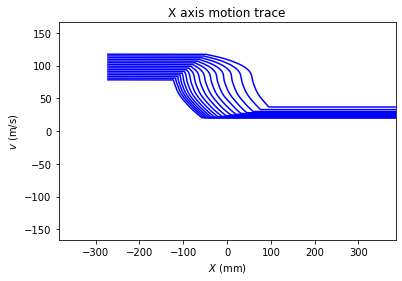

In [9]:
test.percentage()

0.0660761010587391

In [10]:
test2 = White_class.Whitelight(**(max_parameters[1]["params"]))
test2.motion_trace()

Completed in 50.71 s.                                               
Completed in 1:03.                                                 
Completed in 59.92 s.                                               
Completed in 1:06.                                                 
Completed in 53.17 s.                                               
Completed in 56.05 s.                                               
Completed in 51.09 s.                                               
Completed in 49.85 s.                                              
Completed in 1:03.                                                  
Completed in 1:30.                                                 
Completed in 1:22.                                                 
Completed in 1:13.                                                 
Completed in 1:30.                                                 
Completed in 1:36.                                                  
Completed in 1:42.                       

In [11]:
test2.percentage()

0.0661678730192505

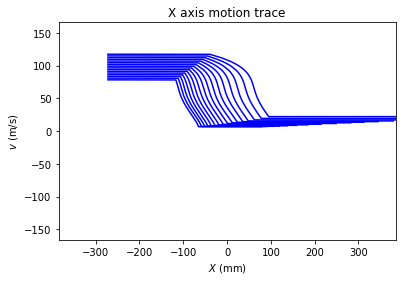

In [12]:
test2.plot(save=False,save_name="./Pictures/main_det=19.7.png")